# Machine Learning - Regressão Logística

👩‍💻 **Autora**

**Juliana de Sousa Ferreira**  
Cientista de Dados

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer  # Para carregar o dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, RocCurveDisplay
)

# Configuração visual (opcional)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Passo 1: Carregamento e inspeção inicial dos dados

**Código principal:** Carregamos o dataset usando load_breast_cancer() do scikit-learn, criamos um DataFrame com Pandas e adicionamos a coluna 'target'.

**Por quê?:** Antes de qualquer análise, precisamos carregar os dados e dar uma olhada rápida para entender a estrutura. Isso ajuda a identificar quantas linhas (amostras) e colunas (features) há, e se os tipos de dados estão corretos (ex: números em vez de texto).

**O que revela:**

* df.head(): Mostra as primeiras 5 linhas. Aqui, você vê valores reais para
features como 'mean radius' (raio médio das células). Isso dá uma ideia de como os dados se parecem – todos numéricos, sem texto.

* df.info(): Exibe o número de entradas (569 amostras), 30 features + 1 target, e confirma que não há valores nulos (non-null count = 569 para todas). Tipos: float64 para features (bons para cálculos) e int64 para target.

* **Interpretação:** Se houver problemas como colunas erradas ou tipos incorretos, corrigimos aqui. Nesse dataset, tudo está limpo, o que é comum em datasets de benchmark.

In [ ]:
# Carregar o dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Adiciona a coluna alvo (0: maligno, 1: benigno)

# Exibir as primeiras linhas para inspeção
print("Primeiras 5 linhas do dataset:")
print(df.head())

Primeiras 5 linhas do dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimete

## Passo 2: Estatísticas descritivas

**Código principal:** df.describe().

**Por quê?:** Fornece um resumo estatístico (média, mediana, mínimo, máximo, desvio padrão etc.) para entender a distribuição e a escala das features. Isso ajuda a detectar anomalias, como valores muito altos ou baixos.

**O que revela:**

* Exemplo: Para 'mean radius', a média é +-14.12, mínimo +-6.98, máximo +-28.11. O desvio padrão (~3.52) indica variação moderada.

* **Interpretação:** Features como 'mean area' têm valores maiores (média ~654), enquanto 'mean texture' tem menores (média ~19). Isso sugere que as features estão em escalas diferentes – importante para ML, pois modelos como regressão logística ou SVMs funcionam melhor com dados normalizados (vamos falar disso no final). A mediana vs. média pode indicar assimetria (ex: se mediana < média, distribuição inclinada para a direita).

In [ ]:
# Inspeção inicial
print("\nInformações gerais do dataset:")
print(df.info())  # Tipos de dados, colunas, etc.

print("\nEstatísticas descritivas:")
print(df.describe())  # Média, mediana, min/max, etc.

print("\nShape do dataset (linhas, colunas):", df.shape)


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64

## Passo 3: Verificar valores faltantes e duplicados

**Código principal:** df.isnull().sum() e df.duplicated().sum().

**Por quê?:** Dados reais frequentemente têm missing values ou duplicatas, que podem enviesar análises. Removê-los garante qualidade.

**O que revela:** Nesse dataset, zero faltantes e zero duplicados – perfeito! Se houvesse, removeríamos para evitar erros em cálculos.

**Interpretação:** Dataset limpo, pronto para prosseguir. Em dados reais, você poderia imputar valores faltantes (ex: com média) em vez de remover.

In [ ]:
# Verificar valores faltantes e duplicados
print("\nValores faltantes por coluna:")
print(df.isnull().sum())

duplicados = df.duplicated().sum()
print("\nNúmero de linhas duplicadas:", duplicados)
if duplicados > 0:
    df = df.drop_duplicates()  # Remove duplicados se existirem
    print("Duplicados removidos. Novo shape:", df.shape)


Valores faltantes por coluna:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Número de linhas duplicadas: 0


## Passo 4: Análise univariada - Distribuição das features

**Código principal:** Histogramas com df.hist() e countplot com Seaborn para a target.

**Por quê?:** Análise univariada olha cada variável sozinha. Ajuda a entender distribuições (normais? assimétricas?), outliers e balanceamento de classes.

**Gráficos e interpretação:**

* **Histogramas** (um grid de 30 gráficos, um por feature): Cada histograma mostra a frequência de valores em "bins" (intervalos). Exemplo:

  * 'mean radius': Pode ser ligeiramente assimétrico para a direita (mais valores baixos), indicando que tumores benignos (menores) são mais comuns.

  * Features como 'worst concave points': Muitas parecem bimodais (dois picos), sugerindo separação natural entre classes (benigno vs. maligno).

  * **Interpretação geral:** Procure por distribuições normais (sino) – boas para ML. Assimetrias podem precisar de transformações (ex: log). Outliers aparecem como barras isoladas no final.

* **Countplot da target:** Uma barra para 0 (maligno) e 1 (benigno).

  * Nesse dataset: ~37% maligno e ~63% benigno (aprox. 212 vs. 357 amostras).

  * **Interpretação:** Classes ligeiramente desbalanceadas. Em ML, isso pode fazer o modelo prever mais "benigno". Solução: técnicas como oversampling (SMOTE) ou undersampling.

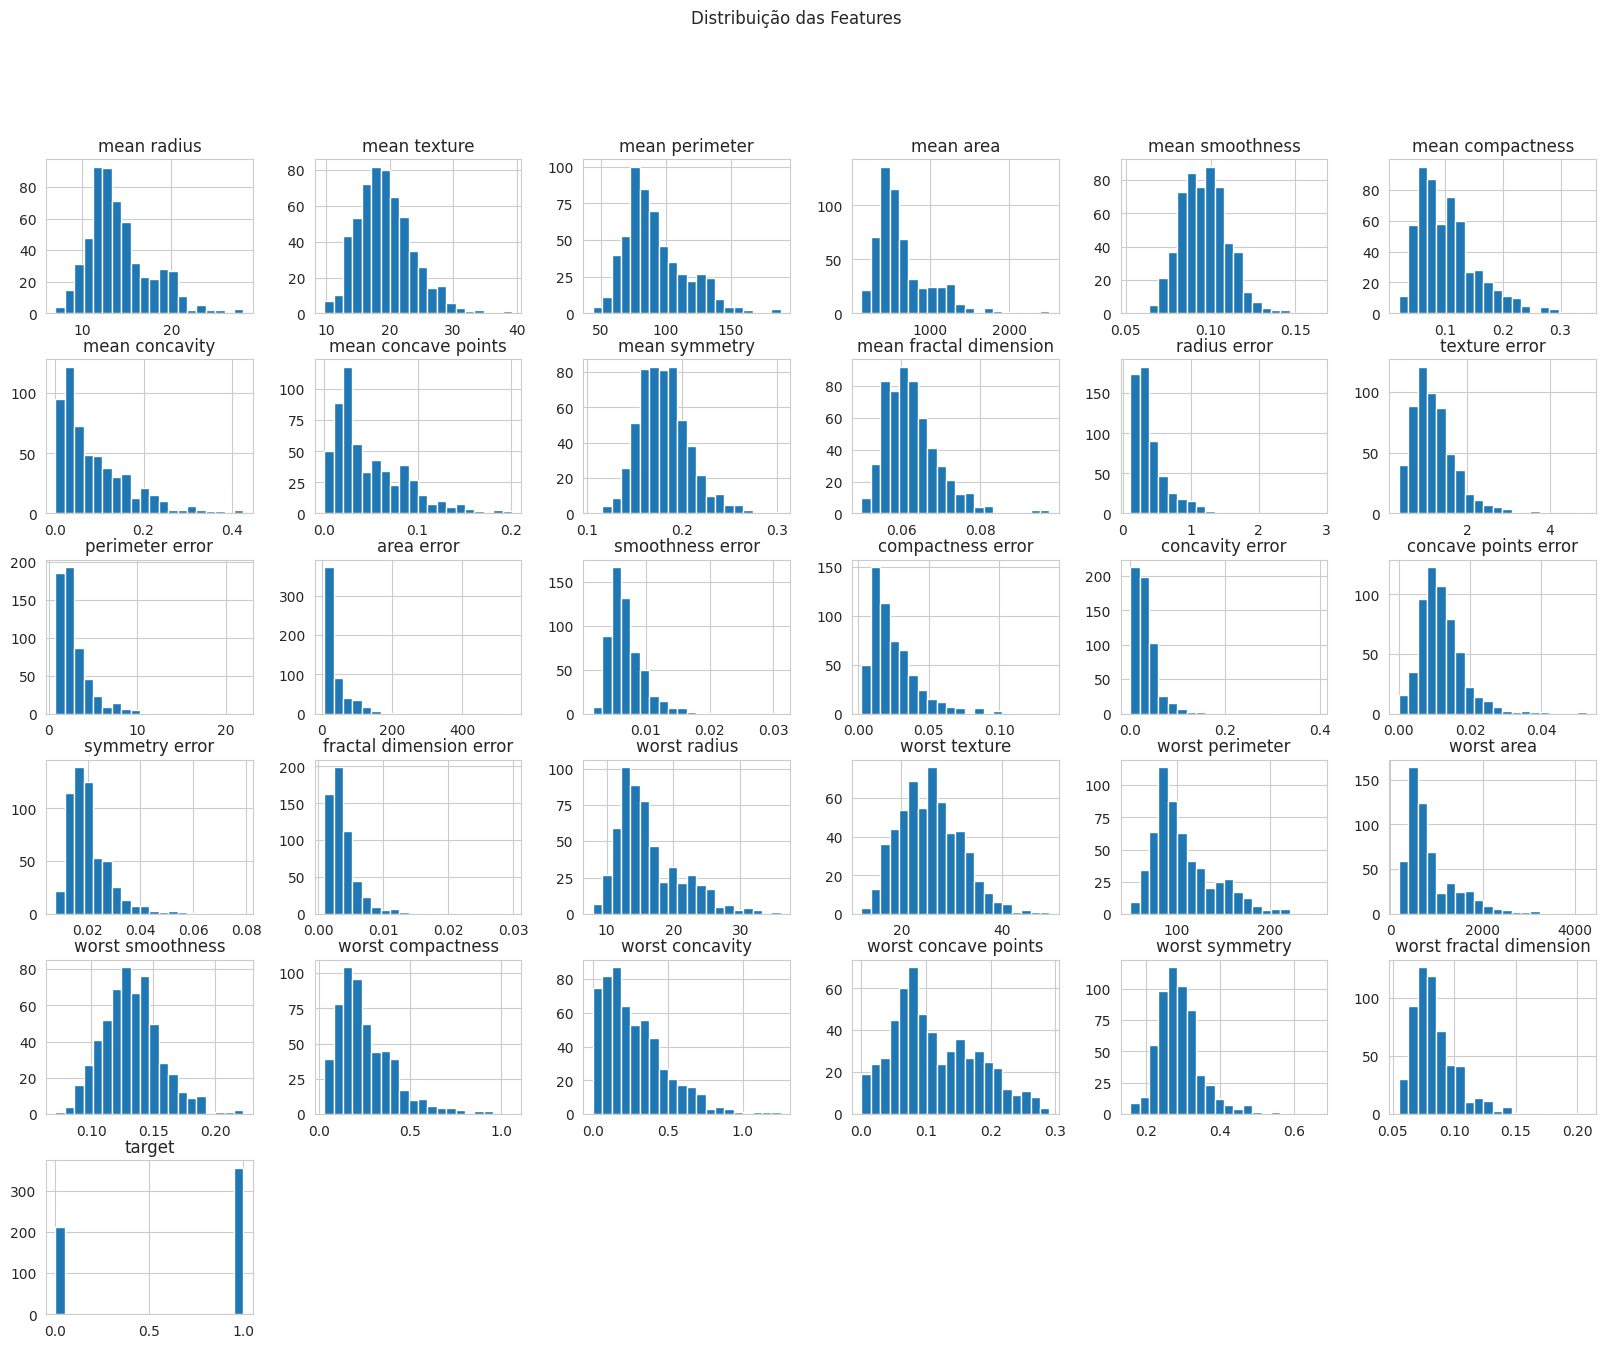

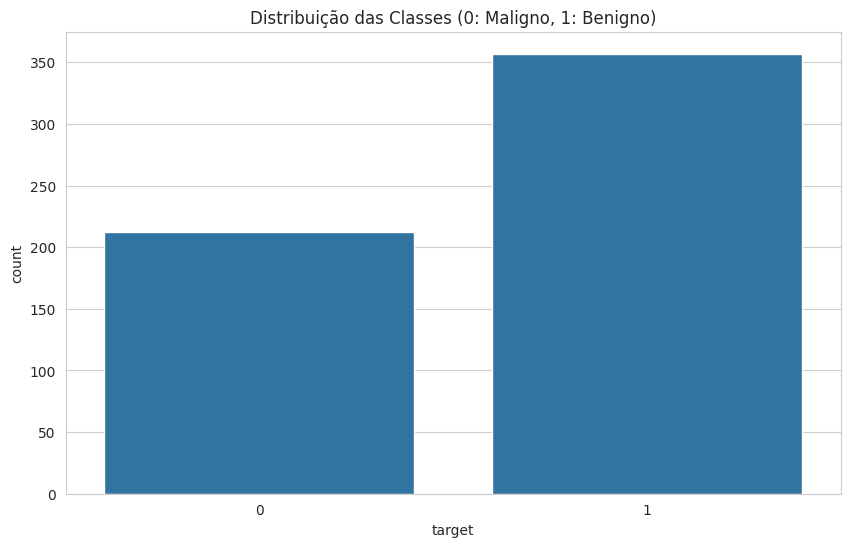


Contagem das classes:
target
1    62.741652
0    37.258348
Name: proportion, dtype: float64


In [ ]:
# Análise univariada - Distribuição das features
# Histogramas para todas as features (pode ser demorado, ajuste se necessário)
df.hist(bins=20, figsize=(20, 15))
plt.suptitle("Distribuição das Features")
plt.show()

# Distribuição da variável alvo
sns.countplot(x='target', data=df)
plt.title("Distribuição das Classes (0: Maligno, 1: Benigno)")
plt.show()
print("\nContagem das classes:")
print(df['target'].value_counts(normalize=True) * 100)  # Percentual

## Passo 5: Análise bivariada - Correlações e relações

**Código principal:** Matriz de correlação com df.corr(), heatmap com Seaborn, correlações com target, e boxplots para features selecionadas.

**Por quê?:** Agora olhamos relações entre variáveis. Correlações mostram se features andam juntas (redundância) ou com a target (poder preditivo).

**Gráficos e interpretação:**

* **Heatmap da matriz de correlação:** Um mapa de calor
colorido (vermelho: correlação positiva alta, azul: negativa). Não anota valores para evitar bagunça, mas você pode adicionar annot=True se quiser.

  * **Interpretação:** Features como 'mean radius' e 'mean perimeter' têm correlação ~0.99 (quase idênticas – redundantes). Grupos de features "mean", "se" e "worst" se correlacionam dentro dos grupos. Com target: Correlações negativas fortes (ex: 'worst radius' ~ -0.78), significando que valores altos indicam maligno (0).

  * Por quê útil? Features redundantes podem ser removidas para simplificar o modelo (ex: usar PCA para redução de dimensionalidade).

* **Correlações com target (impresso no console):** Lista as top 10 mais correlacionadas (ex: 'worst concave points' é a mais negativa, bom preditor).

  * **Interpretação:** Features com |correlação| > 0.5 são úteis para classificação. Isso guia feature selection.

* **Boxplots (um por feature selecionada vs. target):** Caixas mostram mediana, quartis e outliers. Duas caixas por gráfico: uma para 0 (maligno) e 1 (benigno).

  * **Exemplo:** Em 'mean radius', a caixa para maligno é mais alta (valores maiores), com mediana ~17 vs. ~12 para benigno.

  * **Interpretação:** Mostra separação entre classes. Se as caixas não se sobrepõem muito, a feature discrimina bem (bom para ML). Outliers são pontos fora das "whiskers" – indicam amostras atípicas.

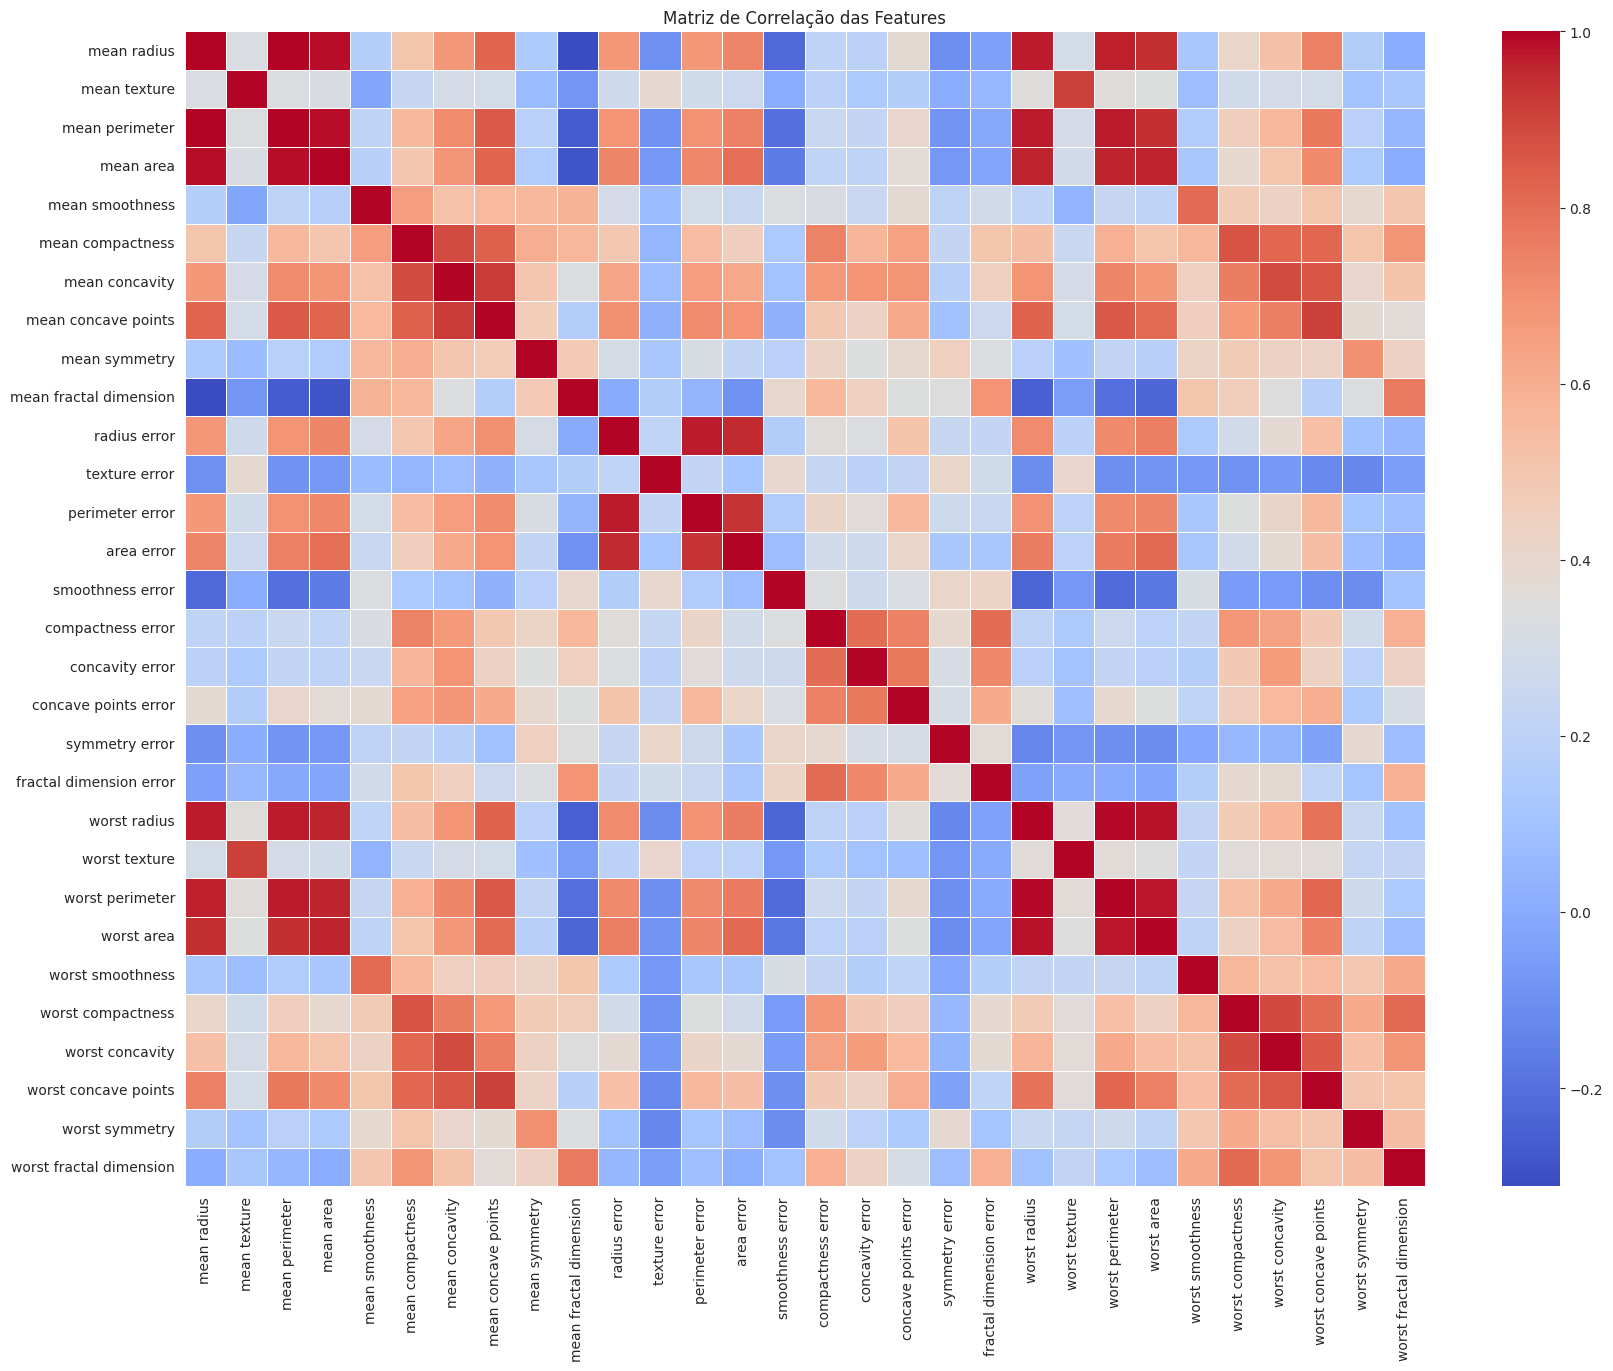


Correlações com a variável target (top 10):
target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
Name: target, dtype: float64


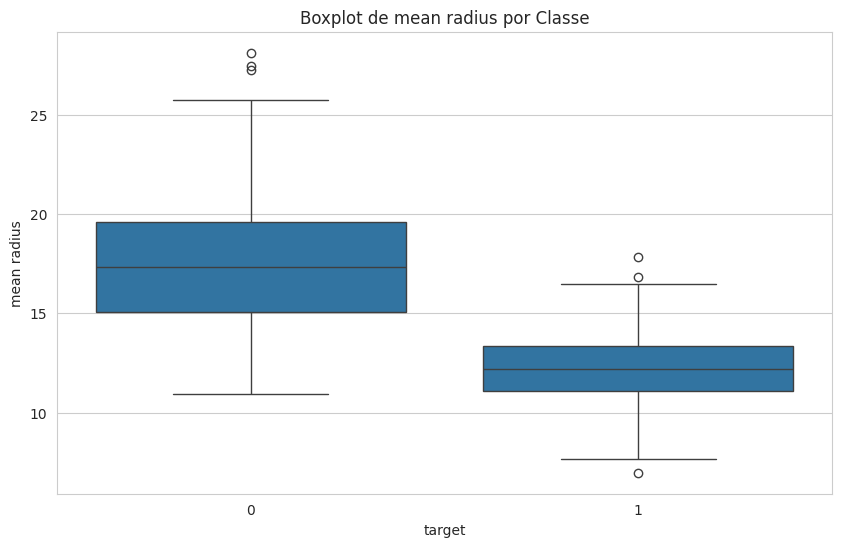

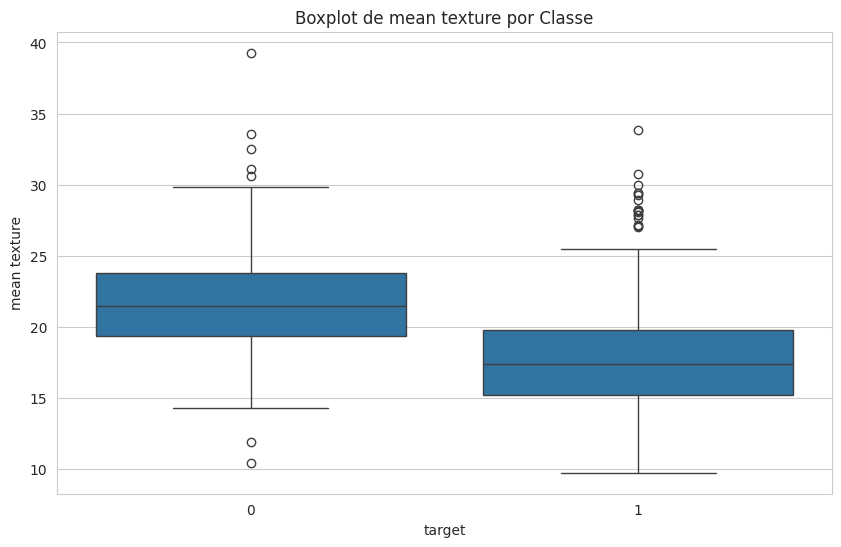

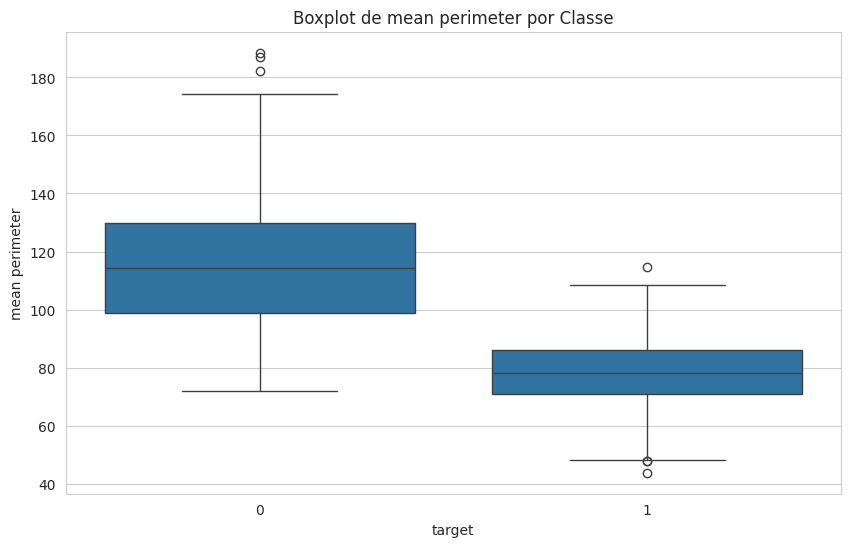

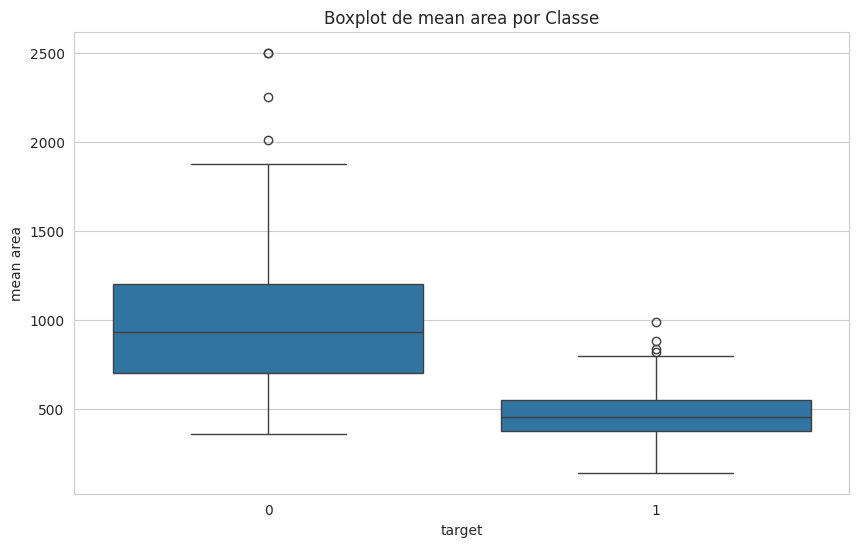

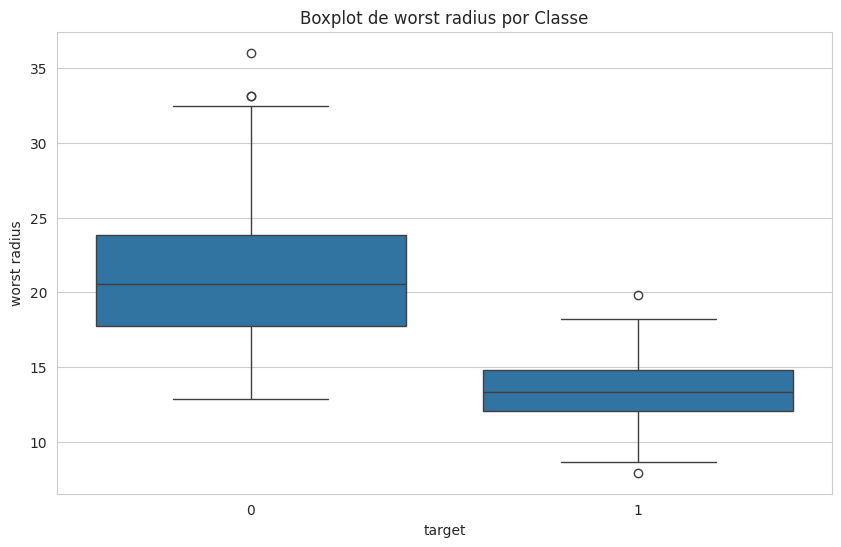

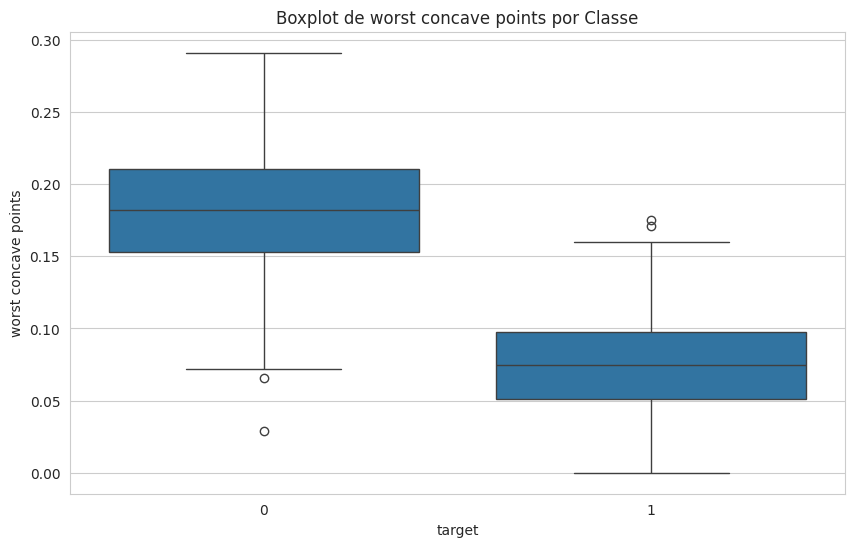

In [ ]:
# Análise bivariada - Correlações
# Matriz de correlação (excluindo a target por enquanto)
corr_matrix = df.drop('target', axis=1).corr()

# Heatmap da matriz de correlação
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação das Features")
plt.show()

# Features mais correlacionadas com a target
correlacoes_target = df.corr()['target'].sort_values(ascending=False)
print("\nCorrelações com a variável target (top 10):")
print(correlacoes_target.head(10))

# Boxplots para features selecionadas vs. target (escolha algumas features chave para evitar overload)
features_selecionadas = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'worst radius', 'worst concave points']
for feature in features_selecionadas:
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f"Boxplot de {feature} por Classe")
    plt.show()

## Passo 6: Detecção de outliers

**Código principal:** Função usando IQR (Intervalo Interquartil) para contar outliers por feature.

**Por quê?:** Outliers podem ser erros ou casos raros, e afetam modelos sensíveis (ex: regressão linear).

**O que revela:** Nesse dataset, várias features têm outliers (ex: 'mean area' pode ter ~20). A maioria em features "worst", que capturam valores extremos.

**Interpretação:** Não remova sem motivo – em dados médicos, outliers podem ser tumores graves. Use para decidir tratamentos (ex: winsorization: capar valores extremos).

In [ ]:
# Detecção de outliers (opcional, usando IQR para exemplo)
# Função para detectar outliers em uma coluna
def detect_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR)))
    return outliers.sum()

print("\nNúmero de outliers por feature:")
for col in df.columns[:-1]:  # Exclui target
    print(f"{col}: {detect_outliers(df[col])}")


Número de outliers por feature:
mean radius: 14
mean texture: 7
mean perimeter: 13
mean area: 25
mean smoothness: 6
mean compactness: 16
mean concavity: 18
mean concave points: 10
mean symmetry: 15
mean fractal dimension: 15
radius error: 38
texture error: 20
perimeter error: 38
area error: 65
smoothness error: 30
compactness error: 28
concavity error: 22
concave points error: 19
symmetry error: 27
fractal dimension error: 28
worst radius: 17
worst texture: 5
worst perimeter: 15
worst area: 35
worst smoothness: 7
worst compactness: 16
worst concavity: 12
worst concave points: 0
worst symmetry: 23
worst fractal dimension: 24


## Passo 7: Visualização de pares (pairplot)

**Código principal:** sns.pairplot(df[features_selecionadas + ['target']], hue='target', ...)

**O que faz:** Cria um grid de gráficos que combina:

  * **Diagonal:** Distribuições (usando KDE - Kernel Density Estimation, uma curva suave em vez de barras de histograma) para cada feature, coloridas por classe (target: 0=maligno em tomate, 1=benigno em azul).

  * **Fora da diagonal:** Scatterplots (gráficos de dispersão) mostrando relações pairwise entre features, também coloridos por classe.

  * Selecionamos apenas features "interessantes" (baseadas na EDA anterior, como 'mean radius' e 'worst concave points') para evitar sobrecarga computacional – o dataset tem 30 features, o que tornaria o plot gigante e lento.

**Por quê é importante:** Na EDA, isso é o "gran finale" univariado/bivariado. Ajuda a visualizar se as classes (benigno vs. maligno) se separam bem no espaço das features. Por exemplo, se os pontos azuis e vermelhos não se misturam em um scatterplot, significa que essas features são boas para classificação. Isso justifica prosseguir para ML: se não houver separação, o modelo pode falhar.

**Interpretação dos resultados:**

  * **Exemplo de scatterplot:** Em 'mean radius' vs. 'worst radius', você verá clusters: pontos vermelhos (maligno) tendem a valores mais altos, azuis (benigno) mais baixos. Linhas retas indicam correlação alta (redundância).

  * **Exemplo de KDE:** Curvas separadas mostram distribuições diferentes por classe – picos distantes indicam discriminação boa.

  * **Insights típicos nesse dataset:** Features como 'worst concave points' separam bem as classes (pouca sobreposição). Se houver sobreposição, o modelo pode errar mais.

**Dicas para iniciantes:** Se o plot demorar, reduza features. hue='target' colore por classe – experimente sem para ver distribuições gerais. Conceito chave: Isso é uma "prévia" do que o modelo fará (separar classes).

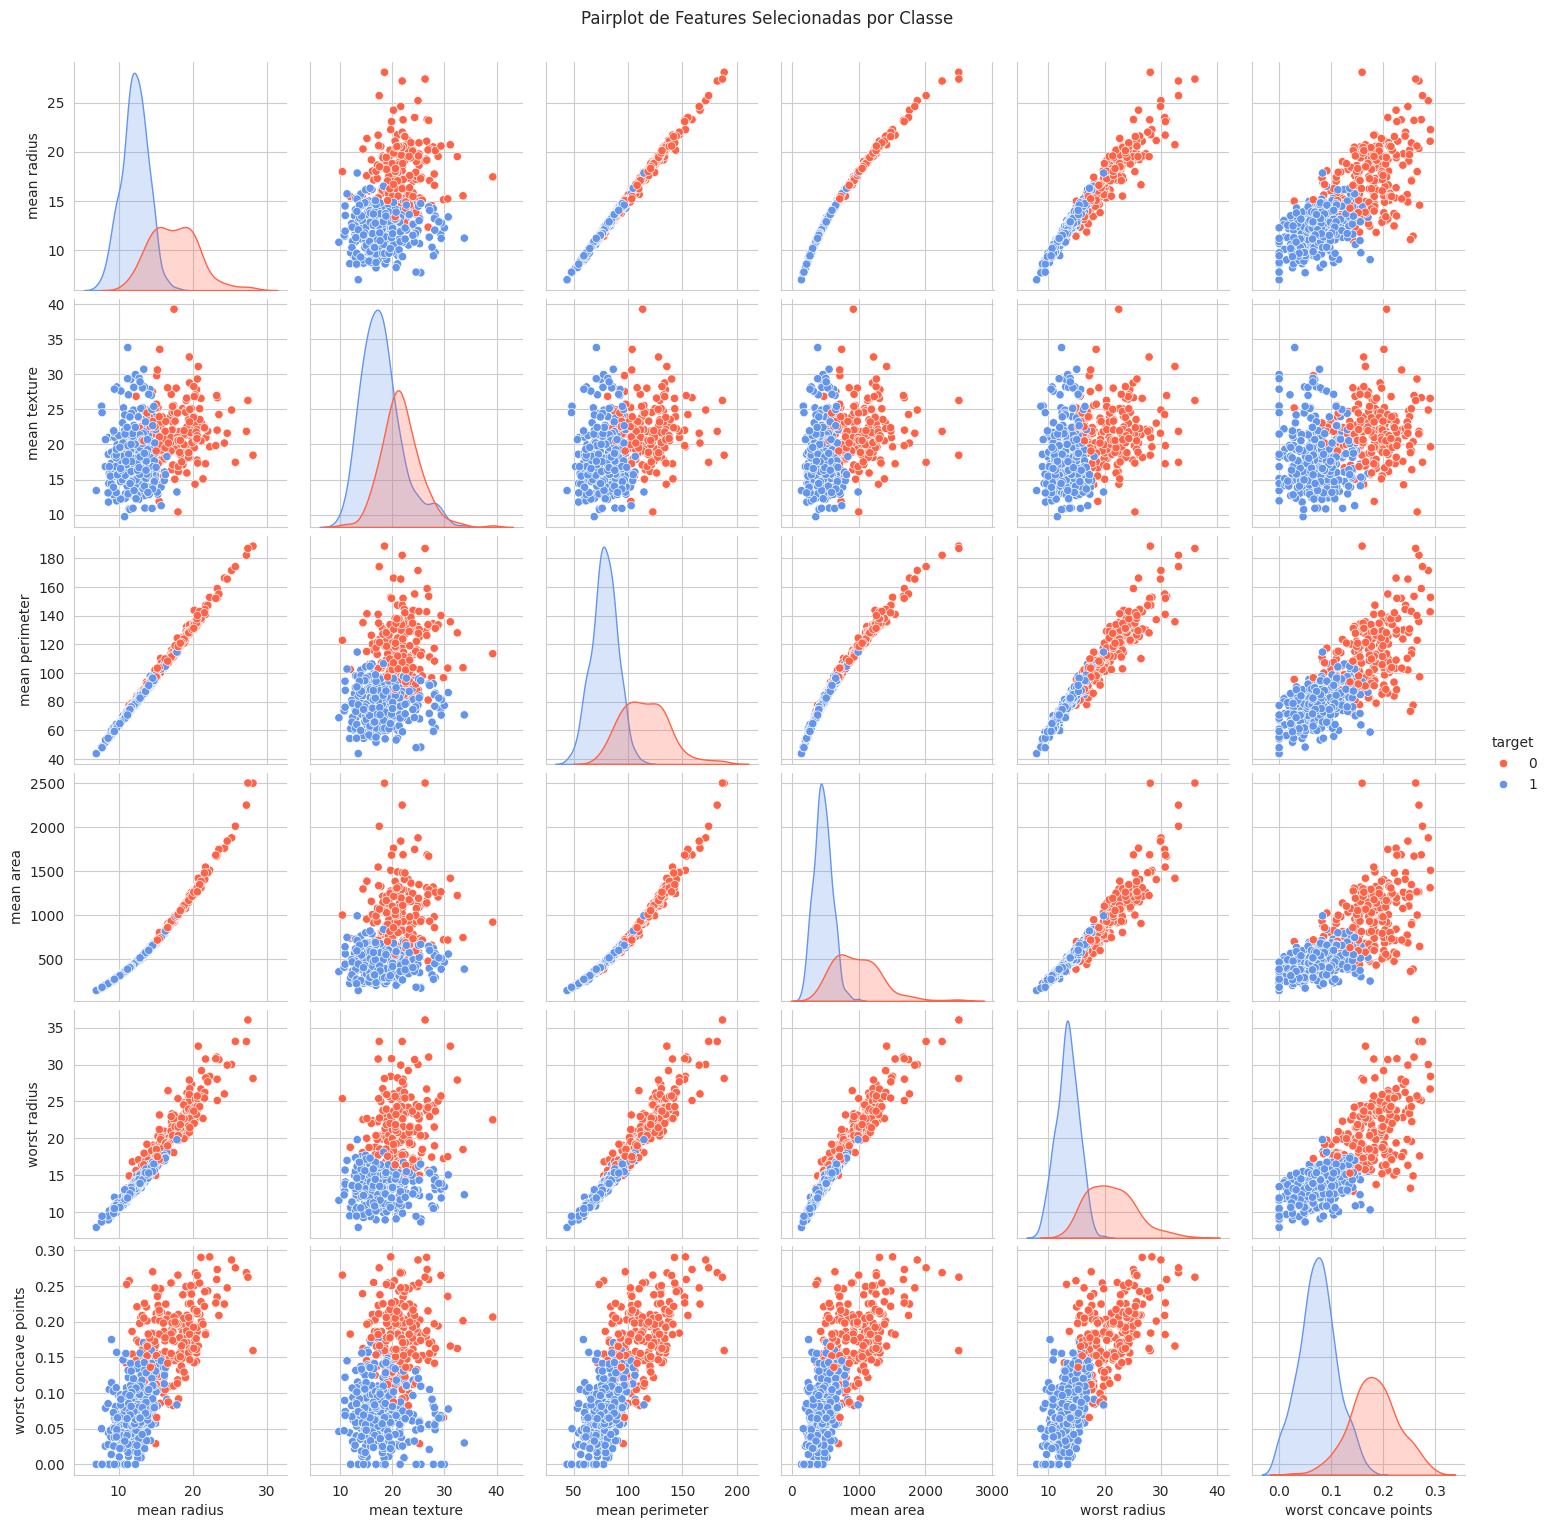

In [ ]:
# Visualização de pares (pairplot) para features selecionadas (pode ser computacionalmente intensivo)
sns.pairplot(df[features_selecionadas + ['target']], hue='target',
             palette={0: 'tomato', 1: 'cornflowerblue'},
             diag_kind='kde')
plt.suptitle("Pairplot de Features Selecionadas por Classe", y=1.02)
plt.show()

## Passo 8: Preparação dos dados para Machine Learning

**Código principal:** Separar X/y, dividir em treino/teste com train_test_split, normalizar com StandardScaler.

**O que faz:**

  * **Separar X e y:** X = todas as features (df sem 'target'); y = apenas 'target' (0 ou 1).

  * **Divisão treino/teste:** 75% dos dados para treino (aprender padrões), 25% para teste (avaliar desempenho em dados "novos"). stratify=y garante que a proporção de classes (ex: 63% benigno) seja mantida em ambos conjuntos – evita viés.

  * **Normalização:** StandardScaler transforma features para média 0 e desvio padrão 1. Fitamos só no treino (para evitar "vazamento" de info do teste), depois aplicamos no teste.

**Por quê é importante:** ML precisa de dados "limpos" e divididos. Sem divisão, o modelo "decora" os dados e falha em novos casos (overfitting). Normalização é crucial para Regressão Logística, que usa distâncias/gradientes – features em escalas diferentes (ex: 'mean area' em centenas vs. 'mean texture' em dezenas) distorcem o modelo.

**Interpretação dos resultados:**

  * Outputs no console: Ex: "Treino: 426 amostras | Teste: 143 amostras". Proporção: ~63% benigno no treino (confirma stratify).

  * Após scaling: Valores viram z-scores (ex: um raio médio de 14 vira ~0). Não muda distribuições, só escala.

**Dicas para iniciantes:** random_state=42 garante reprodutibilidade (mesma divisão toda vez). Erro comum: Esquecer scaling – modelo converge devagar ou erra. Conceito chave: "Vazamento de dados" – nunca use teste no treino!

In [ ]:
# Separando features (X) e alvo (y)
X = df.drop(columns='target')
y = df['target']   # 0 = Maligno, 1 = Benigno

# Divisão treino/teste (estratificada)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,           # 25% teste
    random_state=42,
    stratify=y                # mantém proporção das classes
)

print(f"Treino: {X_train.shape[0]} amostras  |  Teste: {X_test.shape[0]} amostras")
print(f"Proporção no treino: Benigno {y_train.mean():.1%}  |  Maligno {(1-y_train.mean()):.1%}")

# Normalização (ESSENCIAL para regressão logística!)
scaler = StandardScaler()

# Ajustamos SOMENTE no treino
X_train_scaled = scaler.fit_transform(X_train)

# Aplicamos a mesma transformação no teste
X_test_scaled = scaler.transform(X_test)

Treino: 426 amostras  |  Teste: 143 amostras
Proporção no treino: Benigno 62.7%  |  Maligno 37.3%


## Passo 9: Treinamento do modelo - Regressão Logística

**Código principal:** Criar LogisticRegression com parâmetros, treinar com model.fit(X_train_scaled, y_train).

**O que faz:**

  * Cria o modelo: Regressão Logística é um classificador linear que usa uma função sigmoide para prever probabilidades (ex: probabilidade de ser benigno).

  * Parâmetros: solver='lbfgs' (otimizador eficiente para datasets pequenos), max_iter=1000 (iterações para convergir), C=1.0 (regularização para evitar overfitting – menor C = mais regularização).

  * fit: Ajusta pesos (coeficientes) baseados no treino, minimizando erro.

**Por quê é importante:** Aqui o "mágico" acontece: o modelo aprende padrões da EDA (ex: tumores com raio alto tendem a maligno). É um modelo simples, interpretável e bom baseline para classificação binária em dados médicos.

**Interpretação dos resultados:** Apenas "Modelo treinado!" no console. Internamente, calcula coeficientes (ver extra). Se não convergir (raro aqui), aumente max_iter.

**Dicas para iniciantes:** Comece com defaults. Se classes desbalanceadas, teste class_weight='balanced' (dá mais peso à minoria). Conceito chave: Regressão Logística não é "regressão" – é classificação via probabilidades (threshold 0.5: >0.5 = 1, benigno).

In [ ]:
print("\nTreinando Regressão Logística...")

model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    C=1.0,                    # força da regularização (1 = padrão)
    random_state=42,
    class_weight=None         # pode testar 'balanced' depois
)

model.fit(X_train_scaled, y_train)

print("Modelo treinado!")


Treinando Regressão Logística...
Modelo treinado!


## Passo 10: Avaliação do modelo

**Código principal:** Previsões com predict e predict_proba, métricas (accuracy, precision, etc.), relatório, matriz de confusão e curva ROC.

**O que faz:**

  * **Previsões:** Usa dados de teste para prever classes (y_pred) e probabilidades (y_pred_proba).

  * **Métricas:** Calcula acurácia (acertos totais), precisão (acertos positivos verdadeiros), recall (positivos verdadeiros capturados), F1 (média harmônica de precisão/recall).

  * **Relatório:** Tabela com métricas por classe.

  * **Matriz de Confusão:** Grid 2x2 mostrando acertos/erros (ex: Verdadeiro Positivo: benigno previsto como benigno).

  * **Curva ROC:** Plota taxa de verdadeiro positivo vs. falso positivo em thresholds variados. AUC (área sob a curva) mede qualidade geral (1=perfeito, 0.5=aleatório).

**Por quê é importante:** Treinar é fácil; avaliar mostra se o modelo é útil na vida real. Em saúde, recall alto é crítico (não deixar passar câncer – falso negativo é pior que falso positivo).

**Interpretação dos resultados** (típicos nesse dataset):

  * **Métricas:** Acurácia ~98%, Precisão ~98%, Recall ~98%, F1 ~98%.

  * **Matriz de Confusão:** Diagonal alta (ex: 52 malignos certos, 89 benignos certos).

  * **Curva ROC:** Linha perto do topo-esquerda, AUC ~0.99 – excelente! Linha pontilhada é baseline aleatória.

**Considerações Finais**

  * **Fluxo geral:** EDA (entender) → Preparação (limpar/dividir) → Treino (aprender) → Avaliação (validar) → Interpretação (explicar).

  * **Por quê esse modelo?:** Simples, rápido e performa bem nesse dataset (~97% acurácia). Próximo: Teste Random Forest para comparação.

  * **Personalizações:** Se seu dataset for diferente, ajuste nomes de colunas. Rode célula por célula no Jupyter para depurar.

  * **Conceitos chave para iniciante:** Overfitting (bom no treino, ruim no teste), viés (dados desbalanceados), escalabilidade (scaling para features).


RESULTADOS - REGRESSÃO LOGÍSTICA
Acurácia:       98.601%
Precisão:       98.889%
Recall:         98.889%
F1-Score:       98.889%

Relatório completo:
              precision    recall  f1-score   support

 Maligno (0)       0.98      0.98      0.98        53
 Benigno (1)       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



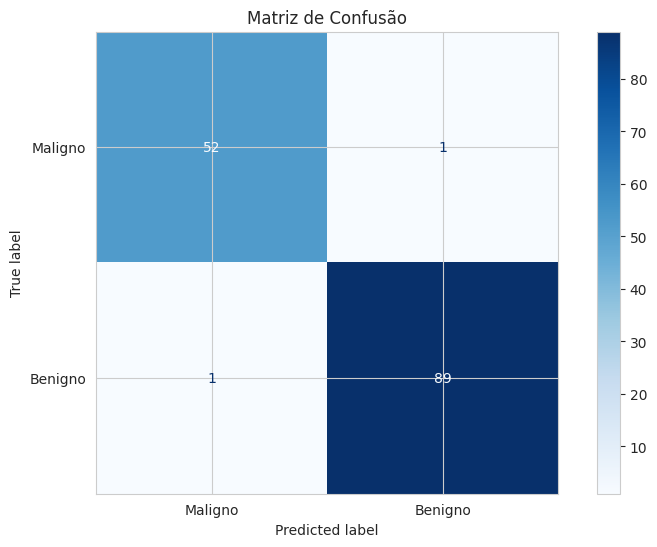

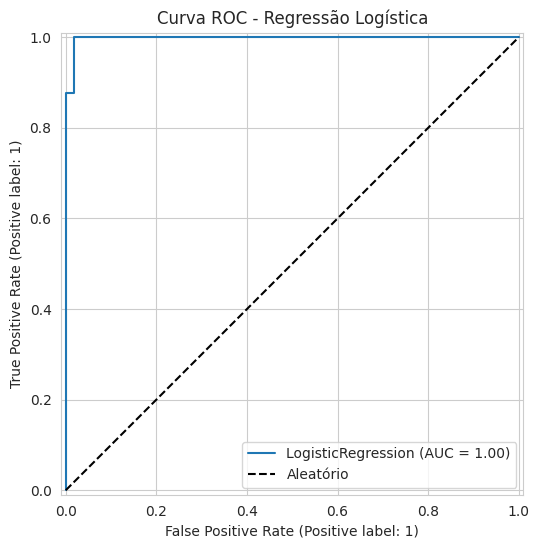

In [ ]:
# Previsões
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # probabilidade de ser Benigno

# Métricas
print("\n" + "="*60)
print("RESULTADOS - REGRESSÃO LOGÍSTICA")
print("="*60)

print(f"Acurácia:       {accuracy_score(y_test, y_pred):.3%}")
print(f"Precisão:       {precision_score(y_test, y_pred):.3%}")
print(f"Recall:         {recall_score(y_test, y_pred):.3%}")
print(f"F1-Score:       {f1_score(y_test, y_pred):.3%}")

print("\nRelatório completo:")
print(classification_report(y_test, y_pred,
                           target_names=['Maligno (0)', 'Benigno (1)']))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Maligno', 'Benigno'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Curva ROC - Regressão Logística')
plt.plot([0,1], [0,1], 'k--', label='Aleatório')
plt.legend()
plt.show()